In [1]:
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn_objects_recipes as sor
import seaborn as sns
import numpy as np
import pandas as pd


penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
# Sample data
np.random.seed(0)
x = np.linspace(0, 10, 150)
y = np.sin(x) + np.random.normal(scale=0.5, size=150)
data = pd.DataFrame({"x": x, "y": y})

# Create Lowess instance without bootstrapping (fast default behavior)
lowess_no_bootstrap = sor.Lowess(frac=0.2, gridsize=100)
result_no_bootstrap = lowess_no_bootstrap(data, xvar='x', yvar='y')
print("No Bootstrap:")
print(result_no_bootstrap)

# Create Lowess instance with bootstrapping
lowess_with_bootstrap = sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95)
result_with_bootstrap = lowess_with_bootstrap(data, xvar='x', yvar='y')
print("\nWith Bootstrap:")
print(result_with_bootstrap)

No Bootstrap:
           x         y
0    0.00000  0.650648
1    0.10101  0.680953
2    0.20202  0.711321
3    0.30303  0.741732
4    0.40404  0.771759
..       ...       ...
95   9.59596 -0.151582
96   9.69697 -0.249765
97   9.79798 -0.347233
98   9.89899 -0.444624
99  10.00000 -0.542536

[100 rows x 2 columns]

With Bootstrap:
           x         y  ci_lower  ci_upper
0    0.00000  0.650648  0.202882  0.992887
1    0.10101  0.680953  0.277375  0.979487
2    0.20202  0.711321  0.345153  0.978694
3    0.30303  0.741732  0.419745  0.977315
4    0.40404  0.771759  0.494767  0.974851
..       ...       ...       ...       ...
95   9.59596 -0.151582 -0.420360  0.173736
96   9.69697 -0.249765 -0.539180  0.133165
97   9.79798 -0.347233 -0.666086  0.093021
98   9.89899 -0.444624 -0.800710  0.053615
99  10.00000 -0.542536 -0.938805  0.018224

[100 rows x 4 columns]


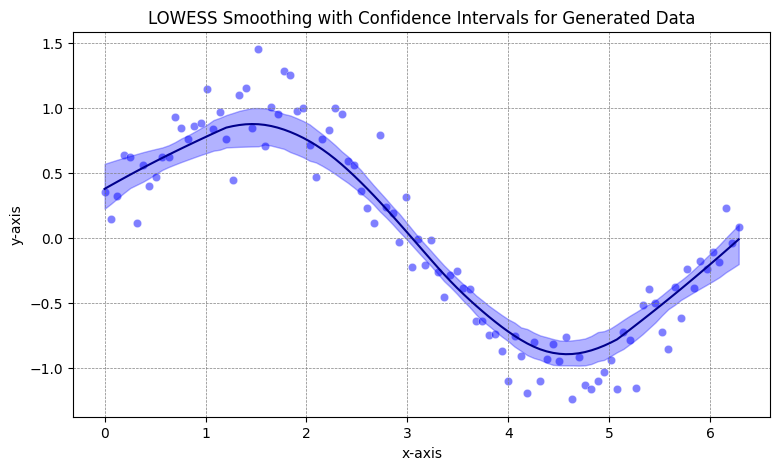

In [3]:
# Generate data for testing
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(size=100) * 0.2
data = pd.DataFrame({"x": x, "y": y})

# Initialize LOWESS instance with bootstrapping
lowess = sor.Lowess(frac=0.4, gridsize=100, num_bootstrap=200, alpha=0.95)
# Call the LOWESS method on prepared data
results = lowess(data, xvar="x", yvar="y")

fig, ax = plt.subplots(figsize=(9, 5))

# Scatter plot of the raw data
sns.scatterplot(x="x", y="y", data=data, ax=ax, color="blue", alpha=0.5)

# LOWESS smoothed line
ax.plot(results["x"], results["y"], color="darkblue")

# Confidence interval shading
ax.fill_between(
    results["x"], results["ci_lower"], results["ci_upper"], color="blue", alpha=0.3
)

# Customizing plot
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_title("LOWESS Smoothing with Confidence Intervals for Generated Data")

# Add gridlines
ax.grid(True, which="both", color="gray", linewidth=0.5, linestyle="--")
plt.savefig("lowess.png")
# plt.show()

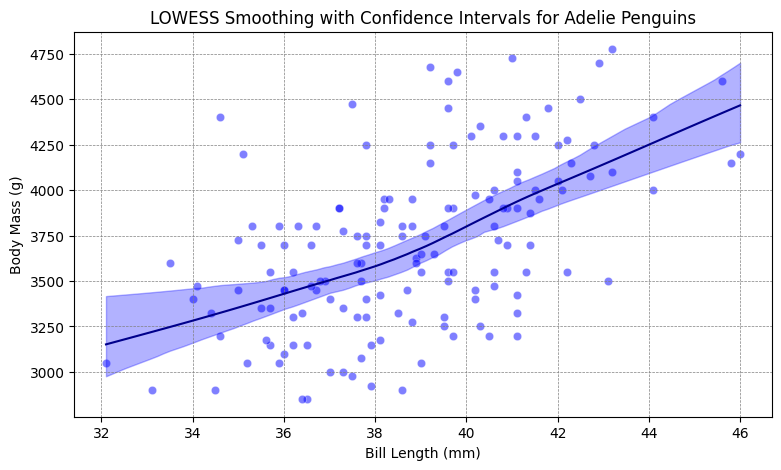

In [4]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Prepare data
data = penguins.copy()

data = data[data['species'] == 'Adelie']

# Initialize LOWESS instance with bootstrapping
lowess_with_bootstrap = sor.Lowess(frac=0.9, gridsize=100, num_bootstrap=200, alpha=0.95)

# Call the LOWESS method on prepared data
results_with_bootstrap = lowess_with_bootstrap(data, xvar ='bill_length_mm', yvar='body_mass_g')

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=data, ax=ax, color='blue', alpha=0.5)
ax.plot(results_with_bootstrap['bill_length_mm'], results_with_bootstrap['body_mass_g'], color='darkblue')
ax.fill_between(results_with_bootstrap['bill_length_mm'], results_with_bootstrap['ci_lower'], results_with_bootstrap['ci_upper'], color='blue', alpha=0.3)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('LOWESS Smoothing with Confidence Intervals for Adelie Penguins')
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')
plt.show()

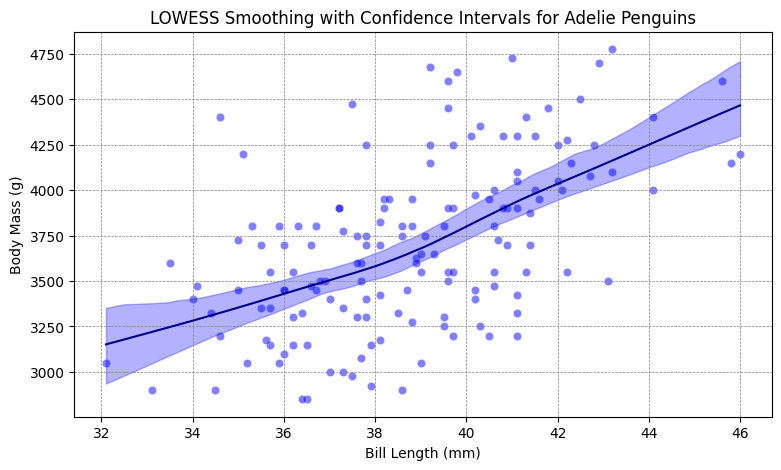

In [5]:
data = penguins.copy()

# Filter data for instance:
data = data[data['species'] == 'Adelie']
# Initialize LOWESS instance
lowess = sor.Lowess(frac=0.9, gridsize=100, num_bootstrap=200, alpha=0.95)

# Call the LOWESS method on prepared data
results = lowess(data, xvar ='bill_length_mm', yvar='body_mass_g')
fig, ax = plt.subplots(figsize=(9, 5))
# Scatter plot of the raw data
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=data, ax=ax, color='blue', alpha=0.5)
# LOWESS smoothed line
ax.plot(results['bill_length_mm'], results['body_mass_g'], color='darkblue')
# Confidence interval shading
ax.fill_between(results['bill_length_mm'], results['ci_lower'], results['ci_upper'], color='blue', alpha=0.3)
# Customizing plot
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('LOWESS Smoothing with Confidence Intervals for Adelie Penguins')
# Add gridlines
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')
plt.show()

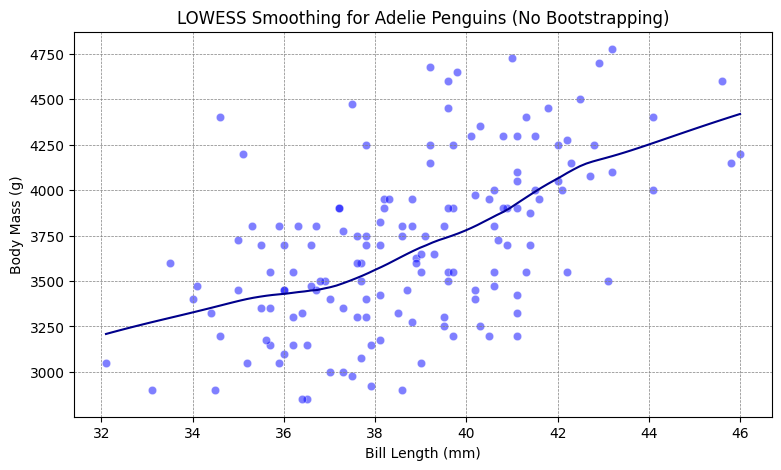

In [6]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Initialize LOWESS instance (no bootstrapping)
lowess_no_bootstrap = sor.Lowess(frac=0.5, gridsize=100)

# Call the LOWESS method on prepared data
results_no_bootstrap = lowess_no_bootstrap(data, xvar ='bill_length_mm', yvar='body_mass_g')

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=data, ax=ax, color='blue', alpha=0.5)
ax.plot(results_no_bootstrap['bill_length_mm'], results_no_bootstrap['body_mass_g'], color='darkblue')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('LOWESS Smoothing for Adelie Penguins (No Bootstrapping)')
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')
plt.show()

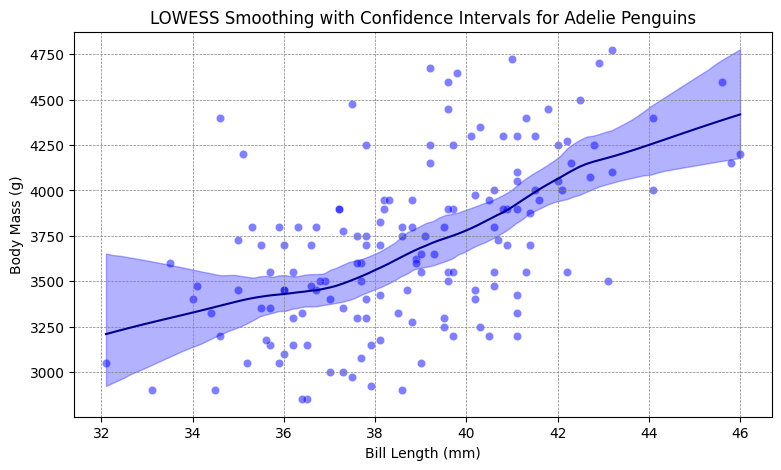

In [7]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Initialize LOWESS instance with bootstrapping
lowess_with_bootstrap = sor.Lowess(frac=0.5, gridsize=100, num_bootstrap=200, alpha=0.95)

# Call the LOWESS method on prepared data
results_with_bootstrap = lowess_with_bootstrap(data, xvar='bill_length_mm', yvar='body_mass_g')

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=data, ax=ax, color='blue', alpha=0.5)
ax.plot(results_with_bootstrap['bill_length_mm'], results_with_bootstrap['body_mass_g'], color='darkblue')
ax.fill_between(results_with_bootstrap['bill_length_mm'], results_with_bootstrap['ci_lower'], results_with_bootstrap['ci_upper'], color='blue', alpha=0.3)
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Body Mass (g)')
ax.set_title('LOWESS Smoothing with Confidence Intervals for Adelie Penguins')
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--')
plt.show()

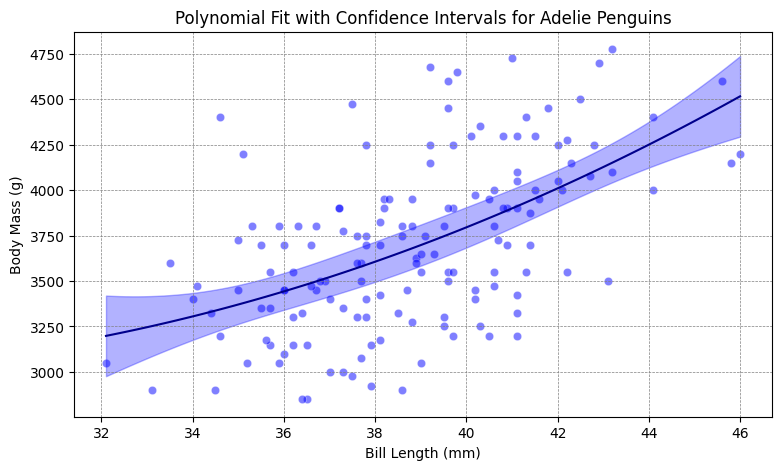

In [4]:
# Prepare data
data = penguins.copy()
data = data[data["species"] == "Adelie"]

# Initialize PolyFit instance with confidence intervals
poly_fit_with_ci = sor.PolyFit(order=2, gridsize=100, alpha=0.05)

# Call the PolyFit method on prepared data
results_with_ci = poly_fit_with_ci(data, "bill_length_mm", "body_mass_g")

# Plotting
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x="bill_length_mm", y="body_mass_g", data=data, ax=ax, color="blue", alpha=0.5)
ax.plot(results_with_ci["bill_length_mm"], results_with_ci["body_mass_g"], color="darkblue")
ax.fill_between(
    results_with_ci["bill_length_mm"],
    results_with_ci["ci_lower"],
    results_with_ci["ci_upper"],
    color="blue",
    alpha=0.3,
)
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Body Mass (g)")
ax.set_title("Polynomial Fit with Confidence Intervals for Adelie Penguins")
ax.grid(True, which="both", color="gray", linewidth=0.5, linestyle="--")
plt.show()